In [1]:
import sys
import numpy as np
sys.path.append("..")
sys.path.append("../src")

# 1. Tensor to voigt conversion and voigt to tensor conversion

In [41]:
import tensor_conversion

In [42]:
cij_forsterite = np.array([[320.5,  68.15,  71.6,     0,     0,     0],
  [ 68.15,  196.5,  76.8,     0,     0,     0],
  [  71.6,   76.8, 233.5,     0,     0,     0],
  [   0,      0,      0,     64,     0,     0],
  [   0,      0,      0,      0,    77,     0],
  [   0,      0,      0,      0,     0,  78.7]])

cij_opx = np.array([[  236.90,   79.60,   63.20,    0.00,    0.00,    0.00],
  [    79.60,  180.50,   56.80,    0.00,    0.00,    0.00],
  [    63.20,   56.80,  230.40,    0.00,    0.00,    0.00],
  [     0.00,    0.00,    0.00,   84.30,    0.00,    0.00],
  [     0.00,    0.00,    0.00,    0.00,   79.40,    0.00],
  [     0.00,    0.00,    0.00,    0.00,    0.00,   80.10]])
cij_cpx = np.array([[  228.10,   78.80,   70.20,    0.00,    7.90,    0.00],
  [    78.80,  181.10,   61.10,    0.00,    5.90,    0.00],
  [    70.20,   61.10,  245.40,    0.00,   39.70,    0.00],
  [     0.00,    0.00,    0.00,   78.90,    0.00,    6.40],
  [     7.90,    5.90,   39.70,    0.00,   68.20,    0.00],
  [     0.00,    0.00,    0.00,    6.40,    0.00,   78.10]])

In [43]:
rho_fo = 3355
rho_opx = 3306
rho_cpx = 3286

In [44]:
cij = cij_forsterite
density = rho_fo

In [45]:
tensor = tensor_conversion.voigt_to_tensor(cij)

print(np.array(tensor))

[[[[320.5    0.     0.  ]
   [  0.    68.15   0.  ]
   [  0.     0.    71.6 ]]

  [[  0.    78.7    0.  ]
   [ 78.7    0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.    77.  ]
   [  0.     0.     0.  ]
   [ 77.     0.     0.  ]]]


 [[[  0.    78.7    0.  ]
   [ 78.7    0.     0.  ]
   [  0.     0.     0.  ]]

  [[ 68.15   0.     0.  ]
   [  0.   196.5    0.  ]
   [  0.     0.    76.8 ]]

  [[  0.     0.     0.  ]
   [  0.     0.    64.  ]
   [  0.    64.     0.  ]]]


 [[[  0.     0.    77.  ]
   [  0.     0.     0.  ]
   [ 77.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.    64.  ]
   [  0.    64.     0.  ]]

  [[ 71.6    0.     0.  ]
   [  0.    76.8    0.  ]
   [  0.     0.   233.5 ]]]]


In [46]:
voigt = tensor_conversion.tensor_to_voigt(tensor)

In [47]:
print(np.array(voigt))

print(voigt == cij)

[[320.5   68.15  71.6    0.     0.     0.  ]
 [ 68.15 196.5   76.8    0.     0.     0.  ]
 [ 71.6   76.8  233.5    0.     0.     0.  ]
 [  0.     0.     0.    64.     0.     0.  ]
 [  0.     0.     0.     0.    77.     0.  ]
 [  0.     0.     0.     0.     0.    78.7 ]]
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


In [48]:
cijkl = tensor_conversion.voigt_to_tensor(voigt)
print(np.array(cijkl))
print(cijkl == tensor)

[[[[320.5    0.     0.  ]
   [  0.    68.15   0.  ]
   [  0.     0.    71.6 ]]

  [[  0.    78.7    0.  ]
   [ 78.7    0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.    77.  ]
   [  0.     0.     0.  ]
   [ 77.     0.     0.  ]]]


 [[[  0.    78.7    0.  ]
   [ 78.7    0.     0.  ]
   [  0.     0.     0.  ]]

  [[ 68.15   0.     0.  ]
   [  0.   196.5    0.  ]
   [  0.     0.    76.8 ]]

  [[  0.     0.     0.  ]
   [  0.     0.    64.  ]
   [  0.    64.     0.  ]]]


 [[[  0.     0.    77.  ]
   [  0.     0.     0.  ]
   [ 77.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.    64.  ]
   [  0.    64.     0.  ]]

  [[ 71.6    0.     0.  ]
   [  0.    76.8    0.  ]
   [  0.     0.   233.5 ]]]]
True


# 2. Tensor rotation

In [49]:
import tensor_rotation
import tensor_rotation_opt
import tensor_conversion
from get_rotations import EulerAngles

In [50]:
ctfobj = EulerAngles("ebsd.ctf")
fors = ctfobj.get_euler_angles(1)
print(fors)

          Euler1    Euler2    Euler3
0        32.0197   35.7966  333.1715
1        32.4525   35.9022  332.6841
2        32.3511   35.5836  333.1899
3        32.3086   35.6978  333.0448
4        32.1575   35.7087  333.1576
...          ...       ...       ...
3580942  97.8000  115.9176  305.0519
3580943  97.6817  116.0201  305.1049
3580944  97.6945  115.9145  305.1010
3580945  97.7562  115.9763  305.0692
3580946  97.7094  115.8832  305.0116

[3580947 rows x 3 columns]


In [51]:
from datetime import datetime
now = datetime.now()
print(now)

2023-12-01 04:11:37.555501


In [52]:
tensor_list = []
tensor = tensor_conversion.voigt_to_tensor(cij)
counter = 0
for i in range(len(fors)):
    alpha = fors.iloc[i]["Euler1"]
    beta = fors.iloc[i]["Euler2"]
    gamma = fors.iloc[i]["Euler3"]
    output = np.array(tensor_rotation_opt.rotate_tensor(tensor, alpha, beta, gamma))
#     print(output)
    output = output/len(fors)
#     print(f"Counter: {counter}")
#     counter +=1
    tensor_list.append(output)

In [53]:
print(now)

2023-12-01 04:11:37.555501


In [54]:
print("efefefe")
now = datetime.now()
print(now)

efefefe
2023-12-01 04:20:13.179263


In [55]:
tensor_sum = np.sum(tensor_list, axis=0)

In [56]:
# import numpy as np
# import pandas as pd

# tensor = tensor_conversion.voigt_to_tensor(cij_forsterite)

# alpha = 30 # Rotation angle around x axis in degrees
# beta = 50 # Rotation angle around y axis in degrees
# gamma = 80    # Rotation angle around z axis in degrees
# output = tensor_rotation.rotate_tensor(tensor, alpha, beta, gamma)

In [57]:
print("__________________")
now = datetime.now()
print(now)

__________________
2023-12-01 04:20:14.882047


In [58]:
print(np.shape(tensor_sum))

(3, 3, 3, 3)


In [59]:
import pandas as pd
print("Output rotated tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor_conversion.tensor_to_voigt(tensor_sum))))

Output rotated tensor in voigt matrix convention:
            0           1           2          3          4          5
0  249.091277   76.405862   81.099913  -0.608862  -0.627189  -5.799372
1   76.405862  212.981488   77.018174  -4.150051   0.033522  -4.065545
2   81.099913   77.018174  252.479338  -6.235134  -0.005967  -2.160890
3   -0.608862   -4.150051   -6.235134  77.713558  -2.991519   0.750140
4   -0.627189    0.033522   -0.005967  -2.991519  84.570941  -1.846559
5   -5.799372   -4.065545   -2.160890   0.750140  -1.846559  75.389450


# 3. Calculating Christoffel tensors

In [60]:
import christoffel

In [61]:
# M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
#                 [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
#                 [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
#                 [  0.,      0.,      0.,     65.66,    0.,      6.415],
#                 [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
#                 [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])
# M = tensor_sum
# import tensor_conversion
# tensor_M = tensor_conversion.voigt_to_tensor(M)
stiffness = tensor_sum
direction = np.array([1, 0, 0])
density = density
christoffel_t = christoffel.christoffel_tensor(stiffness, direction)
wave_moduli, velocities, polarization_directions = christoffel.wave_properties(christoffel_t, density)
print("Christoffel tensor:")
print(christoffel_t)
print("Wave moduli:")
print(wave_moduli)
print("Velocities:")
print(velocities)
print("Polarization directions:")
print(polarization_directions)

Direction:  [1. 0. 0.]
Christoffel tensor:
[[249.09127651  -5.79937221  -0.62718937]
 [ -5.79937221  75.38945009  -1.84655922]
 [ -0.62718937  -1.84655922  84.57094072]]
Wave moduli:
[249.28662472691911, 84.92698753113744, 74.83805506979375]
Velocities:
[0.2725857989741219, 0.15910235111866378, 0.14935335536906474]
Polarization directions:
[[ 0.9994397  -0.00290266 -0.03334465]
 [-0.0332943  -0.18837757 -0.98153216]
 [-0.00343233  0.98209239 -0.18836866]]


# 4. Calculating velocity

In [62]:
import christoffel_wave_prop

In [63]:
import numpy as np
import tensor_conversion
# M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
#                 [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
#                 [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
#                 [  0.,      0.,      0.,     65.66,    0.,      6.415],
#                 [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
#                 [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9
M = tensor_sum*10**9

cijkl = M
rho = density

# Calculate vp, vs1 and vs2 over all the directions possible
vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
# Print vp, vs1 and vs2
print("The values of vp are:")
print("Min Vp: ", min(vp)/1000)
print("Max Vp: ", max(vp)/1000)
print("The values of vs1 are:")
print("Min Vs1: ", min(vs1)/1000)
print("Max Vs1: ", max(vs1)/1000)
print("The values of vs2 are:")
print("Min Vs2: ", min(vs2)/1000)
print("Max Vs2: ", max(vs2)/1000)

The values of vp are:
Min Vp:  7.898522845190559
Max Vp:  8.764631559181247
The values of vs1 are:
Min Vs1:  4.761777794308846
Max Vs1:  5.084515939479273
The values of vs2 are:
Min Vs2:  4.708212851707962
Max Vs2:  4.831338787325837


# 5. Anisotropy plot

/Users/usin8611/Documents/codes_anisotropy/anisotropy/notebooks/../src/cijkl_2dplots_vp.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(['{:.1f}'.format(v) for v in cb.get_ticks()])


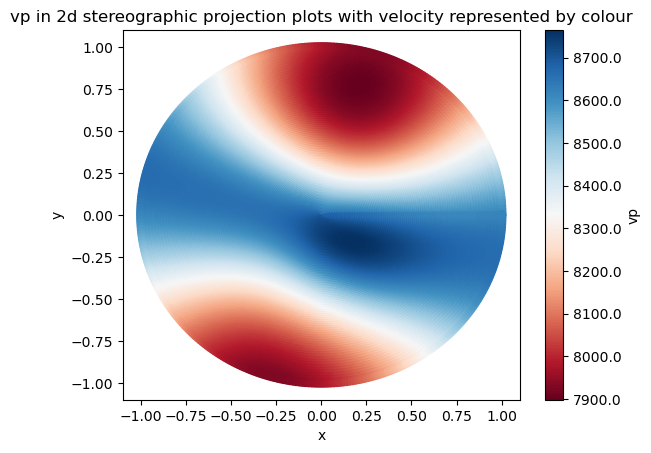

In [64]:
import tensor_conversion
# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
import cijkl_2dplots_vp
# M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
#                 [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
#                 [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
#                 [  0.,      0.,      0.,     65.66,    0.,      6.415],
#                 [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
#                 [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9

M = tensor_sum*10**9

cijkl = M

rho = density

# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
cijkl_2dplots_vp.plot_vp_2d(cijkl, rho)